In [1]:
#KNN REGRESSION

In [4]:
import numpy as np
import sklearn
import sklearn.model_selection as ms
from sklearn import neighbors as nb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

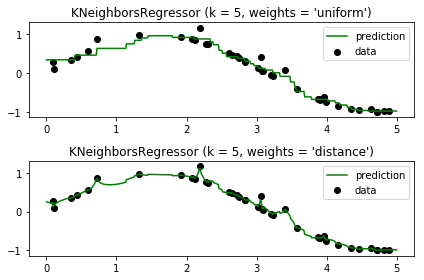

In [57]:
# Generate sample data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 0.5*np.random.rand(8) # Add noise to targets
T = np.linspace(0, 5, 500)[:, np.newaxis]
# ############################################################################
#
# Fit regression model
n_neighbors = 5
for i, weights in enumerate(['uniform', 'distance']):
    knn = nb.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)
    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))
    
plt.tight_layout()
plt.show()

In [58]:
#1. Split your dataset into training and testing through the model section module train_test_split() function

In [124]:
sp500_train = np.array([0.0615039877679064,0.0265707173026132,-0.010782,0.0339465347357007,-0.0305945504003602,0.021303,0.021282,0.000201146648907162,0.00548958290532367,0.003036,-0.000176,-0.007861,0.048403,0.009407,-0.011409,0.015667,0.0294480542063219,0.0099028466243186,0.029117,-0.001571,0.037444,0.0109963553004736,-0.0282299947002671,0.009608,0.0162294273045253,-0.0356068208461038,0.0111157128099173,0.0235501938825637,0.023817,-0.005489,-0.031822,-0.019836394684766,-0.00983483207300527,-0.0137823420656754,0.0349004397213419,-0.012624560184002,0.021627,-0.032114,0.006544,0.029365,0.013501,-0.019971,0.120092,0.009673,0.012370,0.004025,0.0496689867522702,-0.0199409983136594,-0.000301093480643707,0.0147504432013769,-0.009142,0.000950]).reshape(-1,1)
amzn_train =[0.0170401060691843,-0.0010277152283087,-0.001464,0.010294,0.001190,0.008131,0.015137,0.006882,0.006666,-0.004414,0.00238131238583474,-0.0144097634815515,0.00799494499095505,-0.003039,-0.011288,0.008476,0.015119,0.006329,-0.003497,-0.00383534333341574,0.0143131624013902,0.009624,-0.00299296362813635,0.00056743935020639,0.002117,-0.006107,0.000730,0.0140567252557984,0.00539591785045224,-0.000178,0.001913,-0.014337,-0.006460,0.007215,0.013712,-0.006105,0.0157632145020978,0.000795923181434661,0.006850,0.011896,0.001506,0.008632,0.002276,0.002623,-0.002141,-0.001336,0.009140,0.015293,0.00351220909002811,0.00916841749952853,0.002814,-0.003626]

x_train, x_test, y_train, y_test = ms.train_test_split(sp500_train, amzn_train,test_size = 0.4)

In [125]:
#2. Build your KNN regression module using KNeighborsRegressor

In [126]:
knr = nb.KNeighborsRegressor()

In [127]:
#3. Select the best KNN regression model parameters(K, weights) by evaluating the model score with testing data.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arg

Minimum RMSE value for uniform is attained with k = 7 : 0.007391118715637875
Score of manual uniform : 0.2751813536712632
Minimum RMSE value for distance is attained with k = 3 : 0.008313099676018279
Score of manual distance : 0.1303098887169527
Score of GridSearch uniform : 0.24649859762683413
Score of GridSearch distance : 0.10923200095346475


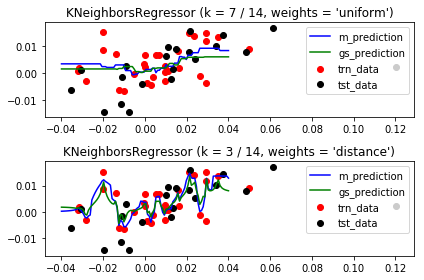

In [128]:
x_axis = np.linspace(-0.04, 0.04, 100)[:, np.newaxis]

from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]}

modelk = GridSearchCV(knr, parameters, cv=5)
modelk.fit(x_train, y_train)
modelk.best_params_

for i, weights in enumerate(['uniform', 'distance']):
    rmse_val = []
    for K in range(20):
        K = K+1
        modelK = nb.KNeighborsRegressor(n_neighbors = K, weights=weights)
        modelK.fit(x_train, y_train)
        predict = modelK.predict(x_test)
        error = sqrt(mean_squared_error(y_test, predict))
        rmse_val.append(error)
    print('Minimum RMSE value for', weights,'is attained with k =', rmse_val.index(min(rmse_val)) , ':', min(rmse_val))
    knr = nb.KNeighborsRegressor(rmse_val.index(min(rmse_val)), weights=weights)
    output = knr.fit(x_train, y_train).predict(x_axis)
    print('Score of manual', ['uniform', 'distance'][i],':', knr.score(x_test, y_test))
    plt.subplot(2, 1, i + 1)
    plt.plot(x_axis, output, c='b', label='m_prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i / %d, weights = '%s')" % (rmse_val.index(min(rmse_val)), modelk.best_params_['n_neighbors'], weights))

for i, weights in enumerate(['uniform', 'distance']):
    knr = nb.KNeighborsRegressor(modelk.best_params_['n_neighbors'], weights=weights)
    output = knr.fit(x_train, y_train).predict(x_axis)
    print('Score of GridSearch', ['uniform', 'distance'][i],':', knr.score(x_test, y_test))
    plt.subplot(2, 1, i + 1)
    plt.scatter(x_train, y_train, c='r', label='trn_data')
    plt.scatter(x_test, y_test, c='k', label='tst_data')
    plt.plot(x_axis, output, c='g', label='gs_prediction')
    plt.axis('tight')
    plt.legend()
    
plt.tight_layout()
plt.show()

In [104]:
#4. Compare the result of your previous linear regression and new KNN regression model.

Coefficient of determination: 0.062341268927383224



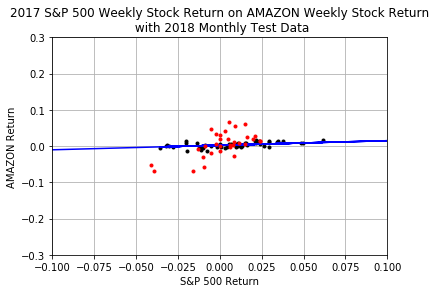

In [139]:
'''This project models the linear regression relationship between the S&P 500(A huge collection of 500 big company's stock) and Amazaon. 
    The time period is set on 2017 with each of their return rate in each month(January to December) recorded.
    The data collected is from the source of Yahoo Finance, and process throug the method of (New-Odd)/Odd to
    find out the return.
    '''
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sp500_train = np.array([0.0615039877679064,0.0265707173026132,-0.010782,0.0339465347357007,-0.0305945504003602,0.021303,0.021282,0.000201146648907162,0.00548958290532367,0.003036,-0.000176,-0.007861,0.048403,0.009407,-0.011409,0.015667,0.0294480542063219,0.0099028466243186,0.029117,-0.001571,0.037444,0.0109963553004736,-0.0282299947002671,0.009608,0.0162294273045253,-0.0356068208461038,0.0111157128099173,0.0235501938825637,0.023817,-0.005489,-0.031822,-0.019836394684766,-0.00983483207300527,-0.0137823420656754,0.0349004397213419,-0.012624560184002,0.021627,-0.032114,0.006544,0.029365,0.013501,-0.019971,0.120092,0.009673,0.012370,0.004025,0.0496689867522702,-0.0199409983136594,-0.000301093480643707,0.0147504432013769,-0.009142,0.000950]).reshape(-1,1)
amzn_train =[0.0170401060691843,-0.0010277152283087,-0.001464,0.010294,0.001190,0.008131,0.015137,0.006882,0.006666,-0.004414,0.00238131238583474,-0.0144097634815515,0.00799494499095505,-0.003039,-0.011288,0.008476,0.015119,0.006329,-0.003497,-0.00383534333341574,0.0143131624013902,0.009624,-0.00299296362813635,0.00056743935020639,0.002117,-0.006107,0.000730,0.0140567252557984,0.00539591785045224,-0.000178,0.001913,-0.014337,-0.006460,0.007215,0.013712,-0.006105,0.0157632145020978,0.000795923181434661,0.006850,0.011896,0.001506,0.008632,0.002276,0.002623,-0.002141,-0.001336,0.009140,0.015293,0.00351220909002811,0.00916841749952853,0.002814,-0.003626]

model = LinearRegression()
model.fit(sp500_train,amzn_train)

plt.figure()
plt.title('2017 S&P 500 Weekly Stock Return on AMAZON Weekly Stock Return\n with 2018 Monthly Test Data')
plt.xlabel('S&P 500 Return')
plt.ylabel('AMAZON Return')
plt.plot(sp500_train,amzn_train,'k.')
plt.axis([-0.1,0.1,-0.3,0.3])
plt.grid(True)

bestfit_y = []
bestfit_y.append(model.predict([[-0.1]]))
for x in range(0,len(amzn_train)):
    bestfit_y.append(model.predict([sp500_train[x]])) 
bestfit_y.append(model.predict([[0.1]]))
sp500_train = np.array([-0.1,0.0615039877679064,0.0265707173026132,-0.010782,0.0339465347357007,-0.0305945504003602,0.021303,0.021282,0.000201146648907162,0.00548958290532367,0.003036,-0.000176,-0.007861,0.048403,0.009407,-0.011409,0.015667,0.0294480542063219,0.0099028466243186,0.029117,-0.001571,0.037444,0.0109963553004736,-0.0282299947002671,0.009608,0.0162294273045253,-0.0356068208461038,0.0111157128099173,0.0235501938825637,0.023817,-0.005489,-0.031822,-0.019836394684766,-0.00983483207300527,-0.0137823420656754,0.0349004397213419,-0.012624560184002,0.021627,-0.032114,0.006544,0.029365,0.013501,-0.019971,0.120092,0.009673,0.012370,0.004025,0.0496689867522702,-0.0199409983136594,-0.000301093480643707,0.0147504432013769,-0.009142,0.000950,0.1]).reshape(-1,1)

plt.plot(sp500_train,bestfit_y,'b')
plt.xlim=(-0.1, 0.1)
plt.ylim=(-0.3,0.3)

'''The tested data here is the stock return of both S&P 500 and AMAZON during each month of 2018. 
We will use this dataset to test if it fits the prediction generated by the 2017 dataset'''

sp500 = np.array([0.019900,0.005210,-0.000086,-0.002431,0.024142,-0.005407,0.003082,0.004884,0.016240,0.000227,-0.008915,-0.013253,0.015248,0.015034,0.000186,0.006064,0.007638,-0.002489,0.005947,0.008617,0.00933320794612953,-0.0102842950571818,0.0115960165438103,0.008499178021874,-0.00535553233563217,-0.00974952202657208,-0.041046,0.000235,-0.039414,0.024211,0.021281187246851,-0.01609]).reshape(-1,1)
amzn = [0.0181892354730433,0.0675850043431845,0.0295452050720149,0.005297,0.013890,-0.017805,0.042222,0.019495,0.0258598328346958,0.0189906004132483,-0.000175,-0.009250,0.006371,0.059861,0.000370,0.0019683900846066,0.00331267171842743,0.034558,-0.00163,0.012310,0.056324,-0.030129,0.009282,-0.0280074168747368,0.0459475352820741,-0.0565901028457314,-0.053470,-0.013742,-0.068718,0.013830,0.028159,-0.069504]
plt.plot(sp500,amzn,'r.')
r2 = model.score(sp500,amzn)
print("Coefficient of determination: "+str(r2)+"\n")

In [131]:
#Compare to the r^2 of the original linear regression, the scores of the KNN Regression show a higher correlation
#Since weekly stock return rate usually wouldn't have a significant amount of change due to the time span (if the company is positive growing), the linear effect wouldn't be as evident as monthly data
#For the original linear regression, since the data set was changed to weekly data rather than monthly, the regression was not as linear as the one that used monthly data.
#When the KNN Regression was using monthly data, it scored a negative score and thus couldn't effectly conclude and predict the test data
#After changing the dataset to weekly, KNN Regression was able to score a more positive score that is also high than the original linear regression
#KNN Regression was able to identify the weekly data that is more significant and give more weight to it compare to the original linear regression that weight all data equally.